### Pipeline gerarchica - Compressione singola

**APPROCCIO GERARCHICO**

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

Procedura:

```
Rinominare nodi del grafo G con il livello corrispondente. Tupla: (livello, nodo)
Identificare sottografo motif nel grafo G (motif definiti nel file pattern.ipynb)
Comprimere il motif in un solo nodo
Memorizzare quali nodi si comprimono nel nuovo nodo
(Aggiornare il peso e il colore degli archi)
Riapplicare il procedimento al grafo risultante in un nuovo livello
```

In [1]:
import collections
import networkx as nx
from grandiso import find_motifs

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

In [3]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

In [4]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)
    
    return G

G0 = rinomina(G0)
G0.nodes()

NodeView(((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)))

In [5]:
# utile per avere una lista di soli nodi: [1, 2, 3, 4, 5, 6]
# nodi = list(G_rin.nodes()) 
# nodi = [x[1] for x in nodi] 
# nodi

#### Sottografo `motif`

In [6]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

In [7]:
# Sottografo motif da trovare nel grafo G: QUADRATO

motif1 = nx.Graph()
motif1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
# nx.draw(motif1)

***

#### Procedura su grafo rinominato

La funzione `identify` prende in input un grafo `G` e un sottografo `motif`, chiama la funzione `find_motifs` della libreria grandiso che sostituisce una lista di dizionari in cui ogni dizionario è un `motif` trovato in `G` e converte l'output in lista di uniche liste.

In [8]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    if lista1 == []:
        return lista1
    else:
        lista2 = [list(d.values()) for d in lista1]
        lista3 = list(set(tuple(sorted(s)) for s in lista2))
        lista4 = sorted(lista3)
        risultato = [list(el) for el in lista4]
        # mi interessa solo il primo match
        risultato = [x[1] for x in risultato[0]]

        return [risultato]

In [9]:
def comprimi_rinomina(G, livello, motif):
    ris = identify(motif, G)
    nodi = list(G.nodes())
    nodi = [x[1] for x in nodi]
    lun = len(nodi)
    lista_temp = []
    for x in nodi:
        if x in ris[0]:
            lista_temp.append(ris[0][0])
        else:
            lista_temp.append(x)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping = dict(zip(nodi, lista_tuple))

    return mapping

In [10]:
# Rinomino archi del grafo
# Derinomina

def rinomina_archi(G):
    archi = list(G.edges())
    archi2 = []
    for i in archi:
        archi2.append((i[0][1], i[1][1]))
    G = nx.Graph()
    G.add_edges_from(archi2)

    return G

#### Funzione che chiama le funzioni definite sopra

In [11]:
def funzione(motif, G):
    liv = 1
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = comprimi_rinomina(G, liv, motif)
            G = rinomina_archi(G)
            G = nx.relabel_nodes(G, mapping)
            # nx.draw(G)
            print(G.nodes())
            liv += 1
    return G

In [12]:
G = funzione(motif, G0)

[(1, 1), (1, 2), (1, 3), (1, 6)]
[(2, 1), (2, 2)]


In [13]:
# run per quadrati OK
G_test = funzione(motif1, G0)
G_test.nodes()

[(1, 1), (1, 2), (1, 5)]


NodeView(((1, 1), (1, 2), (1, 5)))

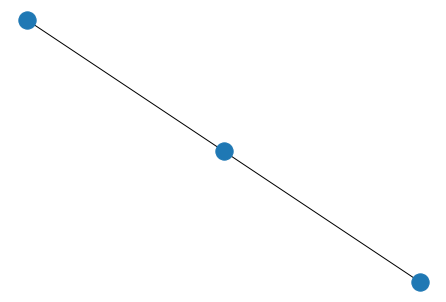

In [14]:
ris = identify(motif1, G0)
liv = 0
mapp = comprimi_rinomina(G0, liv, motif1)
G0 = rinomina_archi(G0)
G0.nodes()
G1 = nx.relabel_nodes(G0, mapp)
nx.draw(G1)

#### MEMORIZZA merge, poter ricostruire e farci indici

In [15]:
# Memorizza [(0, 2), (0, 4), (0, 5)] = (1, 2)

mapping = {1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}
mapping

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

In [16]:
def memo(mapping, n):
    value_occurrences = collections.Counter(mapping.values())
    filtered_dict = {key: value for key, value in mapping.items()
                     if value_occurrences[value] == n}
    new_list = []
    for i, j in filtered_dict.items():
        j = list(j)
        j[1] = i
        j = tuple(j)
        new_list.append(j)
    a = [i for i in new_list[0]]
    a[0] = a[0]+1
    a = tuple(a)
    thisdict = {a: new_list}
    return thisdict

In [17]:
# n fisso a 3 perché graphlet di 3 nodi
memo(mapping, 3)

{(1, 2): [(0, 2), (0, 4), (0, 5)]}

***

#### Indici

In [18]:
G0.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [19]:
G.nodes()

NodeView(((2, 1), (2, 2)))

**Nodi compressi e nodi mantenuti, count e %**

In [20]:
def nodes_decrease(g_0, g_fin):
    grafo_0 = g_0.nodes()
    [grafo_0]
    grafo_fin = g_fin.nodes()
    [grafo_fin]
    # decrease = grafo_0 - grafo_fin
    decrease = len(grafo_0) - len(grafo_fin)
    # % decrease = decrease ÷ grafo_0 × 100
    decrease_perc = decrease / len(grafo_0) * 100
    # remain = grafo_fin
    remain = len(grafo_fin)
    # remain_perc inverso di decrease_perc
    remain_perc = 100 - decrease_perc
    #remain_perc2 = len(grafo_fin) / len(grafo_0) * 100

    return (decrease, decrease_perc, remain, remain_perc)


nodes_decrease(G0, G)

(4, 66.66666666666666, 2, 33.33333333333334)

**Livelli**

In [21]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

In [22]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)
    
    return G

G0 = rinomina(G0)
G0.nodes()

NodeView(((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)))

In [23]:
def funzione(motif, G):
    liv = 1
    lista = []
    while liv < 100:
        ris = identify(motif, G)
        if ris == []:
            break
        else:
            mapping = comprimi_rinomina(G, liv, motif)
            G = rinomina_archi(G)
            G = nx.relabel_nodes(G, mapping)
            # nx.draw(G)
            a = list(G.nodes())
            liv += 1
            lista.append(a)
    return lista

G = funzione(motif, G0)

In [24]:
new = list(G0.nodes())

In [25]:
G.insert(0, new)
G

[[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)],
 [(1, 1), (1, 2), (1, 3), (1, 6)],
 [(2, 1), (2, 2)]]

#### Testare la funzione anche con altri motif

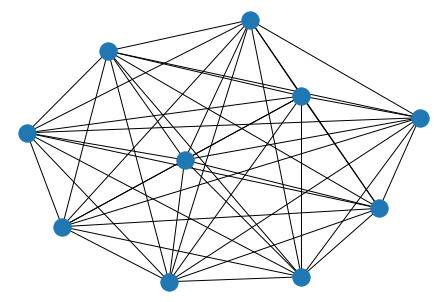

In [26]:
G0 = nx.complete_graph(10, create_using=None)
G0 = rinomina(G0)
nx.draw(G0)